# 03. 군집분석 (클러스터링)
> 비지도학습 기법인 군집 분석에 대해 배워보고 실습해봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 5]
- permalink: /clustering
- exec: colab

### 1. 군집 분석이란?
  
![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst00.png?raw=true)

군집 분석(Clustering analysis)은 주어진 데이터들을 특성에 따라 유사한 것끼리 묶음으로써 각 유형별 특징을 분석하는 기법을 말합니다. 군집 분석의 가장 대표적인 예로 '고객 세분화 (customer segmentation)' 가 있습니다. 다양한 유형의 고객들을 같은 유형끼리 묶어주는 것을 말합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst01.png?raw=true)

예를 들어, 어떤 게임 유저들의 일주일동안 획득한 경험치양과 플레이 시간을 집계하였더니 아래 그림의 왼쪽에 있는 것처럼 확인이 되었다고 해보죠. 이 때 군집 분석을 이용하면 오른쪽 그림처럼 '경험치 획득량과 플레이 시간이 모두 낮은 유형', '경험치 획득량은 높지만 플레이 시간은 낮은 유형', '경험치 획득량은 낮지만 플레이 시간은 높은 유형', '경험치 획득량과 플레이 시간이 모두 높은 유형' 을 자동으로 묶어줄 수 있습니다.

<br>

### 2. 군집 분석의 목적

그렇다면 왜 군집분석을 하는 것일까요? 군집 분석을 하면 전체 데이터를 속성이 비슷한 개체끼리 분류할 수 있습니다. 그리고 이렇게 카테고리별로 개체를 잘 분류하면 관리 편의성 및 효율성이 좋아집니다. 물건을 정리할 때를 생각해 보면 아마 쉽게 이해하실 수 있을 것 같네요. 아래에 있는 왼쪽 그림처럼 여러 물건들을 정리할 때 비슷한 물건끼리 정리해 놓으면 나중에 물건을 찾을 때 쉽게 찾을 수 있겠죠. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst02.png?raw=true)
<br><br>

마찬가지로 만약 어떤 쇼핑몰에서 이용 고객들을 비슷한 유형끼리 잘 분류해 놓는다면 이후에 고객에게 어떤 상품을 추천하거나 서비스를 제공할 때 오른쪽 그림처럼 비슷한 유형의 고객 정보를 활용하여 적절한 서비스를 제공할 수 있을 것입니다.
<br><br>

#### 2.1. 평균의 함정

또한 우리가 군집 분석을 이용해 데이터를 잘 묶을 수 있다면 소위 말하는 '평균의 함정'에 빠지지 않고 잘 대처할 수 있습니다. **'평균의 함정'란 어떤 집단의 평균이 집단에 속한 각 개체의 특성을 잘 반영해 주지 못하는 현상**을 말합니다. '평균의 함정'과 관련해 유명한 일화 중 하나가 미국 전투기 조종석 디자인에 대한 이야기입니다. 1940년대에 미국 공군에서는 전투기 운행 사고가 줄지 않는 원인을 찾기 위해 고심하고 있었습니다. 그런데 원인을 분석해 보니 전투기 조종석의 디자인에 문제가 있었음이 밝혀졌죠. 
<br><br>

![](https://i.pinimg.com/originals/5c/47/db/5c47db6b3c2ed1c486aff86539e4f8d5.jpg)

당시 전투기 조종석은 수천 명의 공군 조종사들의 신체 치수를 측정한 후 이들의 평균값을 참고하여 설계되었습니다. 그런데 길버트 대니얼스라는 학자가 실제 조종사들의 신체 치수와 이 평균값을 비교해 보니 평균에 딱 들어맞는 조종사들이 한 명도 없다는 것을 발견한 것입니다. 따라서 모든 조종사들은 자신의 몸에 맞지 않는 불편한 조종석에서 비행을 해야 했고 이로 인한 조종 실수 때문에 사고가 빈번했던 것입니다. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst03.png?raw=true)

이것은 마치 아래에 있는 왼쪽 그림과 비슷합니다. 전체의 평균이 정작 각 개체들의 실제값과 큰 차이가 있는 상태인 것이죠. 이런 문제를 해결하려면 오른쪽 그림처럼 군집 분석을 통해 비슷한 유형끼리 먼저 묶은 후 각 유형별 평균을 구해서 사용해야 합니다. 
<br><br>

#### 2.2. 심슨의 역설

더 나아가 적절한 군집화 없이 데이터를 이용할 경우 자칫 실제 현상과 반대되는 판단을 할수도 있습니다. 1973년에 U.C. 버클리 대학교는 바로 이런 문제로 인해 구설수에 오른 적이 있습니다. 당시 버클리 대학의 남녀 신입생 합격률은 아래 표와 같습니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst04.png?raw=true)
<br><br>

위 자료에 의하면 남학생에 비해 여학생의 합격률이 상대적으로 낮죠. 그래서 버클리 대학교는 언론 및 대중으로부터 남녀 차별을 하고 있다는 의심을 받게 되었죠. 그런데 학과별로 세분화해서 자료를 집계했더니 아래와 같이 나타났습니다(전체자료 중 인원이 가장 많은 상위 6개 학과만 표시한 자료입니다).  

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst05.png?raw=true)
<br><br>

보시다시피 이렇게 학과별로 세분화된 자료를 보면 여학생의 합격률이 남학생의 합격률에 비해 높은 학과가 더 많습니다. 그런데 **전체 신입생 기준으로 볼 때는 더 낮은 것처럼 보였던 이유는 학과별 입학 정원이 달랐기 때문**입니다. 즉, 여학생들은 남학생들에 비해 입학 정원이 적은 학과에 지원자가 몰리는 바람에 전체 합격률이 낮았던 것이죠.
<br><br>

이렇게 전체 통계량과 여러 그룹을 나눠서 구한 통계량이 서로 반대되는 특성을 갖는 현상을 **'심슨의 역설(Simpson's paradox)'** 이라고 부릅니다. 이런 현상을 피하기 위해서는 전체 데이터를 적절히 분류하여 구한 통계량과 전체 통계량을 같이 비교하는 것이 필요합니다. 그리고 이렇게 전체 데이터를 적절히 몇 개의 그룹으로 분류할 때 군집 분석은 굉장히 유용한 도구입니다. 
<br><br>

#### 2.3. 개인화 vs 획일화

더 나아가 군집 분석은 개인화와 획일화 사이의 적절한 균형점을 제공해 줄 수 있습니다. 요즘은 소위 말하는 '빅데이터 분석' 이 유행하면서 개인화 서비스가 널리 도입되고 있습니다. 그러나 실제 개개인이 갖고 있는 다양한 특성 및 욕구를 정확히 파악하여 서비스한다는 것은 결코 쉬운 일이 아닙니다. 따라서 **각 개체를 따로 분리하여 분석하거나 관리하기 보다는 적정 수준의 유사성을 갖는 개체끼리 그룹을 묶어서 관리하는 것이 더 효율적**입니다. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst06.png?raw=true)
<br><br>


### 3. 인구 통계 기반 고객 세분화의 문제점

그렇다면 군집 분석을 할 때 어떤 것들이 필요할까요? 만약 우리가 고객들을 비슷한 유형끼리 분류한다면 어떤 기준으로 나누는 것이 적절할까요? 가장 먼저 생각해 볼 수 있는 것이 인구 통계에 기반한 방법입니다. 즉, 성별, 연령, 사는 지역, 소득 수준 등을 조사하여 이에 따라 적절한 범주를 정해 구분하는 것이죠. 구체적으로 예를 들자면 아래와 같이 범주를 나눠볼 수 있을 것입니다.
<br><br>

- 성별: 남자 / 여자
- 연령: 10대, 20대, 30대, 40대, ...
- 사는 지역: 서울 강북/강남, 수도권, 충정지역, 호남지역, 영남지역, ...
- 소득 수준: 3천만원, 5천만원, 1억원, 1억원 이상
<br><br>

그런데 이렇게 단순히 인구 통계에 기초한 방법을 사용할 경우 많은 문제가 있습니다. 예를 들어 강남역에 있는 아트 박스 사장님이 위와 같은 방식으로 고객 군집을 나눠서 관리한다고 생각해 보죠. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst08.png?raw=true)

고객의 연령을 10대, 20대, 30대, ... 로 구분할 경우 고등학교 졸업을 앞둔 혹은 막 대학에 입학한 19세 학생은 10살짜리 초등학생과 같은 유형이 되는 반면, 비슷한 성향을 가질 가능성이 높은 20세 학생은 29세인 사회 직장인과 같은 유형으로 묶일 것입니다. 그런데 만약 군집화를 하는 목적이 각 유형별로 기호에 맞는 상품을 개발하려는 목적이었다면 이것은 좋은 군집이 아니겠죠. 따라서 군집 분석을 할 때는 내가 군집화를 수행하는 목적에 맞는 분류 기준을 찾는 것이 중요합니다. 

<br><br>

### 4. 군집 분석 시 고려 사항 - 비슷하다는 것은 무엇인가?

#### 4.1. 유사성을 측정할 항목

우리는 개체들을 비슷한 유형끼리 묶을 때 '비슷'하다는 것이 무엇인지 정확히 정의할 필요가 있습니다. 혹시 예전에 EBS에서 방영한 '동과 서' 라는 다큐멘터리를 보신 분이 계실지 모르겠습니다. 그 프로그램에서는 동양인과 서양인의 사고 방식이나 정서의 차이에 대한 다양한 사례들을 소개했었는데요, 그 중에서 아래 그림처럼 재질과 형태가 조금씩 다른 세 개의 물체를 제시하고 이들을 비슷한 것끼리 두 그룹으로 묶는다면 어떻게 묶을 것인지 질문하는 실험이 있었습니다. 여러분은 아래 세 개 물체 중에 어떤 두 개를 하나의 그룹으로 묶으실 건가요? 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst09.jpg?raw=true)
<br><br>

이것은 그저 심리 실험일 뿐이지만 군집 분석의 관점에서 보자면 유사성을 판단할 때 어떤 속성(재질 혹은 형태)을 이용할 것인지에 대한 문제와 관련이 깊습니다. 그리고 위 사례에서 알 수 있듯이 어떤 속성을 이용할 것인가에 따라 그 결과는 크게 달라지죠.
<br><br>

#### 4.2. 유사성 측정 방법

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst10.png?raw=true)

더 나아가 유사성을 측정할 때 얼마나 객관적이고 정량적으로 측정할 것인지도 중요한 문제입니다. 예를 들어 아래와 같이 파랑색 계열의 개체와 빨간색 계열의 개체들을 묶는다고 할 때 보라색 개체는 어떤 그룹에 묶는 것이 적절할까요? 만약 유사성을 정량적으로 측정하지 않는다면 그룹을 묶을 때마다 (혹은 그룹을 묶는 사람의 주관에 따라) 결과가 달라질 것입니다. 반면 정량적으로 측정할 수 있다면 비록 눈으로 보기에는 애매해 보일지라도 두 그룹의 대표가 되는 개체와 보라색 개체 간의 유사성을 측정한 후 좀 더 값이 큰 쪽으로 묶으면 되기 때문에 일관된 결과를 얻을 수 있겠죠.
<br><br>

지금까지의 내용을 정리하자면 다음과 같습니다. 먼저 **'군집분석(Clusering analysis)'이란 '비슷한 속성을 가진 개체끼리 그룹을 묶을 때 사용하는 데이터 마이닝 기법'** 을 말합니다. 우리가 군집 분석을 하는 목적은 전체 데이터를 비슷한 유형끼리 적절하게 분류함으로써 좀 더 효율적인 관리 및 분석을 하기 위함입니다. 특히, **전체 데이터를 그대로 분석에 활용할 때는 '평균의 함정'이나 '심슨의 역설'과 같은 문제가 발생할 수 있는데 군집화를 통해 대상을 적절하게 여러 개의 묶음으로 나눔으로써 이런 문제를 해결**할 수 있습니다. 그런데 만약 데이터를 여러 군집으로 묶을 때 (인구 통계와 같이) 임의의 기준으로 나누게 되면 오히려 잘못된 의사 결정을 할 수 있습니다. 따라서 **좋은 군집 분석을 위해서는 먼저 어떤 개체 간의 유사성을 판단할 때 어떤 항목을 기준으로 어떻게 정량화할 것인지를 먼저 정해야 합니다.**

<br>

### 5. 유사도(similarity)와 거리(distance)

군집 분석을 하려면 먼저 개체간의 비슷한 정도를 어떻게 정량화할지 정해야 합니다. 이런 비슷한 정도를 **'유사도'** 혹은 **'거리'** 라고 부릅니다. 이 글에서는 '유사도'라는 말과 '거리'라는 말을 혼용해서 사용할 텐데, 기본적인 개념은 비슷하며 다만 **유사도는 값이 클수록 비슷한 것을 의미하고 거리는 반대로 값이 작을수록 비슷하다는 것**을 의미합니다.
<br><br>

유사도를 측정하기 위해선 두 가지를 결정해야 합니다. 하나는 **어떤 값**을 이용해 유사도를 측정할 것이지이고, 또 하나는 **어떤 방법**을 이용해서 정량화를 할 것인지입니다. **전자는 데이터의 특질(feature)를 의미하며, 후자는 유사도 알고리즘을 의미**합니다.
<br><br>

![](https://t1.daumcdn.net/cfile/tistory/991365365AB35D1319)

예를 들어, 고객 세분화를 위해 군집 분석을 한다고 가정해 보죠. 이 때 군집 분석을 위해 사용하는 고객의 인구 통계 정보(성별, 연령, 사는 지역 등)와 구매 정보(구매한 총 금액, 구매한 물품의 종류, 구매한 물품 개수 등)가 데이터의 feature에 해당합니다. 어떤 feature를 사용할 것인가는 군집 분석의 목적에 따라 다릅니다. <br><br>

앞서 아트박스 사장님의 예를 다시 들자면, 만약 군집 분석의 목적이 비슷한 구매 성향을 가진 고객끼리 묶어서 맞춤형 할인 쿠폰을 발급하는 것이라면, 실상 인구 통계 정보보다는 구매 정보를 이용하는 것이 더 좋을 수 있습니다. 혹은 인구 통계 정보를 이용하더라도 단순하게 연령대를 나누기 보다는 좀 더 구매 성향에 맞게 범주를 나누는 것이 필요하겠죠. 다시 말해, 10대, 20대, 30대, ... 이런 식으로 나누기 보다는 초등학생, 중학생, 고등학생, 대학생, 사회 초년생, ... 이런 식으로요. <br><br>
    
참고로 특질(feature) 선택이 잘못되면 이후 과정을 아무리 잘하더라도 좋은 결과가 나오지 않습니다. 따라서 전체 과정에서 이 feature 선택 단계(feature selection)가 가장 중요하다고 해도 과언이 아닙니다. 그러나 안타깝게도 군집 분석에서 feature 선택을 어떻게 하면 잘할까에 대해선 딱히 알려진 좋은 방법은 없습니다. 그래서 보통 feature를 선택할 때는 해당 도메인의 전문가와 함께 여러 가지 탐사 분석 과정을 거치는 것이 필요합니다. <br><br>

이렇게 유사도를 측정할 feature들이 선택되고 나면, 이에 맞는 적절한 유사도 측정 방법을 정해야 합니다. 유사도를 측정하는 방법은 매우 다양하지만, 보통 사용하는 feature 데이터의 속성에 따라 거기에 맞는 유사도 측정 방식이 몇 가지 후보로 정해집니다. 여기서는 각 사례별로 몇 가지를 소개하겠습니다. <br><br>

### 6. 좌표 상의 거리 구하기

#### 6.1. 연속형 변수

가장 널리 사용되는 유사도 측정 방법은 좌표 상의 거리를 구하는 것입니다. 말그대로 각각의 데이터(예를 들면 고객)를 좌표상의 점으로 표현하고 점들 사이의 거리를 구하는 것을 말합니다. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst11.png?raw=true)
<br><br>

위 그림에서는 보기 편하려고 '플레이시간'과 '경험치획득량' 이라는 두 개의 feature만을 사용한 예시를 들었지만 feature 개수는 여러 개가 되더라도 상관없습니다. 3개 이상의 feature이 있더라도 위에 있는 식과 동일하게 동일한 feature끼리 값을 뺀 후 제곱을 해서 더해 나가면 됩니다. 예를 들어 게임 유저 A, B의 거리를 구할 때 '플레이시간', '경험치획득량', '아이템구매금액', '아이템구매횟수' 라는 네 개의 정보를 이용한다면 둘 간의 거리는 아래와 같이 계산하면 됩니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst12.png?raw=true)
<br><br>

#### 6.2. 범주형 변수

보통 군집 분석 대상의 feature 정보들이 숫자형 데이터라면 이렇게 좌표 상의 거리 구하는 방법을 이용합니다. 그런데 만약 일부 데이터가 숫자형 데이터가 아니라 범주형(category) 데이터인 경우엔 어떻게 할까요? 예를 들어 게임 유저 정보에 '성별'이나 '직업' 같은 데이터를 추가한다면 이 때는 어떻게 거리를 구해야 할까요? <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst13.png?raw=true)

일반적으로 범주형 데이터를 숫자형 데이터로 만들기 위해선 **'원핫 인코딩이라는 방법을 이용합니다.** 정보이론시간에 이미 말씀드렸지만 다시 말씀드리자면, 원핫 인코딩이란, 범주형 변수를 여러 개의 숫자형 변수로 변환하는 방법을 말합니다. 보통 범주형 변수에 들어가는 '값의 종류 개수 - 1개' 만큼의 변수를 만든 후 각 개체의 범주형 값에 해당하는 변수는 1, 나머지는 0을 채워넣는 방식을 말합니다. 예를 들어 아래와 같이 3개의 범주를 갖는 어떤 변수가 있다면 해당 변수 대신 2개의 더미 변수를 추가하여 아래와 같이 변환하는 것이죠. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst14.png?raw=true)

만약 위 처럼 그냥 구분만 가게끔 만들면 되지 않는가? 라고 생각해서 유형3의 변수를 그냥 '00'으로 처리해도 될까요? 대부분의 경우 안됩니다만, 군집분석에서는 더더욱, 절대 그렇게 하시면 안됩니다. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst15.png?raw=true)

왜냐하면, 군집 분석에서 개체 간의 거리를 구할 때 유형3에 대한 원핫 인코딩을 따로 만들지 않으면 **개체 간의 거리가 불균등하게 구해지기 때문**입니다. 가령, 방금처럼 유형3 변수를 따로 두지 않고 원핫 인코딩을 하게 되면 유형1과 유형2 사이의 거리와 유형3과 나머지 개체 간의 거리가 서로 다릅니다. 반면, 유형3의 인코딩을 추가하면 모든 경우에 거리가 동일해지죠. 다시 말해 위와 같은 잘못된 방식으로 원핫 인코딩을 하고 군집 분석을 하면 유형1과 유형2 의 개체들이 유형3에 비해 덜 유사한 것으로 측정되는 문제가 발생합니다. 

<br>

### 7. 다양한 거리와 유사도 측정방법

지금까지 설명한 좌표 상의 거리를 구하는 방법을 '유클리드 거리 (Euclidian distance)' 라고 부릅니다. 그리고 우리는 선형대수 시간에 맨하탄 거리에 대해서 배웠었죠. 그런데 이 외에도 좌표상의 거리를 구하는 방법은 여러 가지가 있습니다.
<br><br>


#### 7.1. 맨하탄 거리 (Manhattan distance)

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst16.png?raw=true)

이미 선형대수 시간에 배웠지만 다시 한번 짚고 넘어갑시다. 유클리드 거리는 두 점 사이의 최단 거리를 대각선으로 가로 질러서 구하는 방법인 반면, 맨하탄 거리는 마치 격자형 도로로만 이뤄진 도시에서 두 장소를 이동하듯이 거리를 구하는 방법입니다. 항상 그런 것은 아니지만 개체의 **차원이 큰 경우 군집 분석 시 유클리드 거리보다 맨하탄 거리를 이용하는 것이 더 좋다고 알려져 있습니다.** (참고논문: https://bib.dbvis.de/uploadedFiles/155.pdf)
<br><br>

#### 7.2. 마할라노비스 거리 (Mahalanobis distance) - 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst17.png?raw=true)

만약 위 그림과 같은 데이터가 있을 때 그냥 유클리드 거리를 구하면 A는 C에 비해 B와 거리가 훨씬 더 작게 측정될 것입니다. 그러나 전체 데이터의 분포를 살펴 보면 x축과 y축은 서로 양의 상관이 존재하며 이 때문에 A와 C는 B보다 좀 더 데이터가 밀집된 방향에 위치해 있습니다. 따라서 이렇게 전반적인 데이터의 분포나 분산을 생각해 보면 단순히 B를 C보다 더 가깝다고 판단하는 것은 부적절할 수 있습니다. 
<br><br>

다시 말해, 전반적으로 X축과 Y축 변수간에 양의 상관이 있는 상태에서는 B와 같이 전반적인 상관 관계에 역행하는 데이터는 드물게 나타나기 때문에 이런 데이터와 일반적인 경향에 따르는 데이터 사이의 유사도는 낮다고 보는 것이 더 좋은 선택일 수 있는 것이죠. 즉, **마할라노비스 거리는 이처럼 변수들간의 공분산이 존재할 경우, 상관관계에 기반하여 거리를 생각하는 방식**이라고 할 수 있습니다.
<br><br>

#### 7.3. 문장 간의 거리 구하기

좌표 상의 거리를 구하는 방법은 단순하고 직관적이라는 장점이 있지만 아쉽게도 모든 데이터가 이런 식으로 표현되지는 않습니다. 예를 들어 여러 개의 문장들 간의 유사도를 구하고 싶다면 각 문장들을 좌표에 표현하기는 쉽지 않습니다 (최근에 많이 연구되고 있는 embedding 이라는 기법을 사용하면 가능하긴 합니다). 따라서 이런 경우엔 다른 방법을 이용해서 문장 간의 거리를 구해야 합니다. <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst18.png?raw=true)

문장 간의 거리를 구하는 가장 일반적인 방법은 위와 같이 두 문장 사이에 차이가 나는 글자수를 세는 방법입니다 (만약 두 문장의 길이가 다르면 부족하거나 남는 글자수도 같이 계산합니다). 이것을 'Optimal matching' 알고리즘이라고 부르는데, 텍스트 문장 뿐만 아니라 일반적으로 시퀀스 데이터 사이의 거리를 구할 때 많이 사용하는 방법입니다. 참고로 아래 그림에서는 '아빠가 방에 들어간다.' 라는 문장을 기준으로 다른 세 개의 문장에서 차이가 나는 글자들을 빨간색으로 표시했습니다. 
<br><br>

#### 7.4. 문서 사이의 거리 구하기

바로 직전에 소개한 거리 구하기 방법은 단순히 글자가 비슷한 문장끼리 분류하고 싶을 때 사용할 수 있습니다. 하지만 **실제 문서들을 분류할 때는 좀 더 문서에 포함된 의미나 주제를 고려하여 유사도를 구해야 합니다.** 이를 위해선 문서에 들어있는 주요 단어들만 골라낸 후 전체 단어 목록 중에서 어떤 단어들이 많이 포함되어 있는지를 보고 결정하는 것이 더 적절합니다. 이때 자주 사용하는 방법이 **'코사인 유사도 (Cosine similarity)' 라는 방법입니다.** <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst19.png?raw=true)

예를 들어 위 그림과 같이 정치 관련 기사와 경제 관련 기사에 들어가는 주요 단어들의 목록에는 크게 차이가 있습니다. 정치 기사에는 아무래도 '정부' 나 '청와대', '국회' 등의 단어들이 자주 등장할 테고, '경제성장률' 이나 '평창올림픽' 같이 해당 시기에 정부가 관심을 갖고 있는 주요 정책과 관련된 단어들도 많이 등장하겠죠. 반면 경제 관련 기사에는 '금리', '투자', '은행' 등의 단어나 혹은 '비트코인', '가상화폐' 등의 해당 시기의 트랜드를 반영하는 단어들이 자주 등장할 것입니다. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst20.png?raw=true)

따라서 이런 경우 미리 기사에 등장하는 모든 주요 단어에 대한 사전 목록을 만들어 놓은 후, 각 기사별로 주요 단어 목록 중 해당 기사에 등장한 단어의 빈도수를 기입합니다. 그러면 **각 기사마다 주요 단어 등장 횟수에 대한 벡터**를 만들 수 있습니다. 이후 **이 벡터 사이의 각도에 대한 코사인 값을 구하는 것**이죠. 만약 두 벡터가 같은 방향을 가리킨다면 두 벡터 간의 각도는 0도일 텐데 0도에 대한 코사인 값은 1입니다. 반대로 두 벡터의 방향이 멀어질수록 코사인 값은 1보다 작은 값이 되며 두 벡터의 방향이 직교(90도)하면 0이 됩니다. (참고로 이 예시와 같이 주요 단어의 빈도수에 대한 벡터를 만들 때는 값이 0보다 작을 수 없기 때문에 90도보다 더 각도가 벌어질 수는 없습니다). 
<br><br>

#### 7.5. 좌표 거리 구하기 vs 코사인 유사도 구하기

 혹시 왜 문서 간의 유사도를 구할 때 좌표 거리를 이용하지 않고 이렇게 복잡하게 코사인 유사도를 구하는지 의구심을 갖는 분이 계실지도 모릅니다. 다시 말해 위와 같이 주요 단어의 빈도수를 구하고 나면 그냥 이 값들을 이용해서 각 문서를 좌표 상의 점으로 표현한 후 두 문서의 거리를 구해도 될텐데 말이죠. 결론부터 얘기하자면, 만약 두 벡터를 비교할 때 벡터에 있는 값들의 **전체 크기에 상관없이 상대적인 값들에만 관심이 있다면 코사인 유사도를 사용**하며, **값의 절대적인 크기도 중요하다면 좌표 거리를 구해야 합니다.** 
<br><br>
 
![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst20.png?raw=true)

예를 들어 위 그림과 같이 또 다른 경제 관련 기사 C 와 정치 관련 기사 D 가 있다고 해보죠. 그런데 기사 C와 D는 정식 기사인 A, B와 달리 중요 소식만 짧게 전달하는 단신 기사여서 전체 분량이 매우 적다면 아래와 같이 벡터의 크기가 상대적으로 작을 것입니다. 이런 경우 비록 기사 C는 경제 관련 단어들이 상대적으로 많이 포함되었더라도 A에 비해 전체 단어 수가 적기 때문에 **벡터의 방향은 같아도 두 점의 거리는 매우 멀게 됩니다.** D역시 마찬가지로 B와 방향은 비슷해도 거리는 멀게 됩니다. 그래서 좌표 거리를 구하게 되면 **C와 D는 각각 A와 B 와의 거리에 비해 둘 사이의 거리가 더 가깝게 구해집니다.** 결국 좌표 거리를 이용해서 문서의 유사도를 구할 경우 문서에 포함된 주요 단어가 무엇인지에 상관없이 분량이 적은 문서들은 모두 비슷한 문서로 묶이는 문제가 발생하게 되죠. <br><br>

#### 7.6. 집합간의 유사도 구하기 
 
![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst22.png?raw=true)

마지막으로 소개할 방법은 집합 간의 유사도를 구하는 방법입니다. 예를 들어 고객이 구매한 상품 목록을 이용해서 어떤 상품들의 유사도를 측정한다고 가정해 보죠. 만약 A라는 상품을 구매한 소비자들과 B라는 상품을 구매한 소비자들의 집합을 봤을 때 **집합 사이에 교집합의 크기가 클수록 이 두 상품은 (소비자의 구매 선호도 측면에 볼 때) 유사도가 높다고 판단**수 있습니다. 이렇게 집합 간의 교집합 크기를 이용해서 유사도를 측정하는 방법을 '자카드 유사도 (Jaccard similarity)' 라고 합니다. 
<br><br>

지금까지 개체 간의 유사도 혹은 거리를 측정하는 몇 가지 방법을 소개했는데요, 이 외에도 다양한 측정 방법들이 있습니다. 또한 여기서 소개한 방법들은 비교적 많이 사용하는 방법이긴 하지만 어떤 방법이 가장 좋다라는 것은 없으며 군집 분석의 목적에 따라 적절한 방법을 선택하는 것이 중요합니다. 
<br><br>

소개한 내용을 간략히 정리하자면 다음과 같습니다. 

- 대부분의 정형 데이터는 좌표 상의 거리 구하기를 사용할 수 있습니다. 그리고 이 경우 유클리드 거리가 가장 보편적인 방법입니다. 
- 만약 상관성이 강한 변수쌍이 존재한다면 마할라노비스 거리를 구하는 것이 더 적절합니다. 
- 만약 변수 간의 상관성이 없고, 데이터의 변수가 많다면 (즉, 차원이 크다면) 맨하탄 거리를 이용하는 것이 더 좋습니다. 
- 데이터의 절대적인 크기는 중요하지 않고 변수들의 상대적인 비율만 고려해야 한다면 코사인 유사도를 사용합니다. 
- 분석 대상이 만약 시퀀스 데이터라면 Optimal matching 과 같은 시퀀스 데이터를 위한 유사도 측정 방법을 사용합니다. 
- 만약 데이터가 순서나 양을 갖지 않는 집합 데이터라면 자카드 유사도를 이용합니다. 
<br><br>

이렇게 유사도를 측정하는 방식을 정하고 나면 이제 측정된 값을 이용해 군집 분석을 수행하게 됩니다. 군집 분석 방법 역시 매우 다양한데, 보통 유사도 측정 방법에 따라 거기에 맞는 방법들이 있습니다. 그럼 다음 챕터에서는 유사도 측정 방식 및 데이터의 특징에 따라 어떤 군집 분석 방법을 사용할 수 있는지 소개하겠습니다. 

<br>

### 8. 군집화 알고리즘

지금까지는 군집 분석이란 무엇이고 왜 필요한지, 군집 분석을 할 때 고려해야 할 것들은 무엇인지 등에 대해 알아 보았습니다. 또한 군집 분석을 할 때 꼭 필요한 유사도 (혹은 거리)를 측정하는 방법에 대해서 다양한 방법들을 소개했습니다. 이번 편에서는 이렇게 측정된 유사도를 바탕으로 서로 유사한 개체끼리 그룹을 묶기 위한 군집화 알고리즘에 대해서 소개하려고 합니다. <br><br>

군집 분석 방법은 매우 다양하며 저마다의 강점과 한계점이 있습니다. 따라서 군집 분석을 하고자 하는 데이터의 특징이나 형태에 따라 적절한 방법을 사용해야 합니다. 이 글에서는 이 중에서 대표적인 알고리즘 몇 가지를 소개하고 각 알고리즘의 특징 및 장/단점, 어떤 상황에서 사용해야 하는지 등을 설명하겠습니다. <br><br>

#### 8.1. k-평균 알고리즘 (k-means algorithm)

상당수의 군집 분석 관련 자료에서 가장 먼저 소개되는 대표적인 알고리즘입니다. 이 알고리즘이 가장 널리 사용되는 이유는 알고리즘이 직관적이고 쉬우면서도 평균적으로 괜찮은 결과가 나오기 때문이죠. k 평균 알고리즘은 말 그대로 k 개의 평균값(중심점)을 이용해서 군집을 만드는 방식입니다. 알고리즘의 동작 방식은 다음과 같습니다. 
<br><br>
 
![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst23.png?raw=true)

- 1) 최초에 임의의 점 k 개를 중심점으로 지정합니다.
- 2) 각 데이터를 k 개의 점과 비교하여 가장 가까운 점이 있는 쪽으로 분류합니다.
- 3) 모든 데이터를 k개 그룹으로 분류하고 나면, 각 그룹의 중심점을 계산합니다.
- 4) 이전 단계에서 계산한 k 개의 중심점을 이용해서 2), 3) 단계를 반복합니다. 이 때 3)단계에서 갱신한 k개의 중심점이 이전 과정에서 사용한 중심점들과 차이가 없거나 미리 정한 수준 이하로만 변하면 과정을 종료합니다.
<br><br>

참고로 k 평균 알고리즘을 사용할 때 분석가는 전체 데이터를 몇 개의 그룹으로 묶을 것인지를 나타내는 **k값을 명시적으로 지정**해줘야 합니다. 어떤 자료에서는 **이것을 k 평균 알고리즘의 단점으로 꼽는 경우가 있는데 이것은 잘못된 설명**입니다. 뒤에서 다른 알고리즘들을 설명할 때 보면 아시겠지만 대부분의 군집화 알고리즘은 군집을 만들기 위한 몇 가지 파라미터들을 분석가가 명시적으로 지정해 줘야 합니다. **이런 파라미터 설정이 없이 모든 것을 자동으로 지정해 주는 알고리즘은 제가 아는 한 거의 없습니다.** <br><br>


#### 8.2. k 평균 알고리즘의 주요 특징
- 첫째, **좌표 기반**의 군집 분석 방법입니다. 위 그림에서 보다시피 개체들을 좌표 상의 점으로 표현한 후 각 점들의 **거리를 기반으로 군집을 묶는 방법**입니다. 따라서 위에서 소개했던 좌표 기반의 거리 측정 방식을 사용할 수 있는 데이터에 대해서만 이 방법을 사용할 수 있습니다. 

- 둘째, 대용량 데이터 처리에 유리합니다. k 평균 알고리즘은 분산 처리에 매우 유리한 알고리즘입니다. 아주 단순하게 보자면 k개 그룹에 대한 거리 측정이나 중심점 갱신 등의 작업은 k개의 시스템으로 분산하여 계산할 수 있죠. 또한 **전체 계산량이 그리 많지 않기 때문에 대용량 데이터에 대한 군집 분석에 좋습니다.**

- 셋째, 각 유형의 특징을 파악하기 좋습니다. 군집 분석을 하는 주요 목적 중 하나는 전체 데이터를 유형별로 분류하여 특징을 파악하는 탐사 분석이나 고객 세그먼테이션을 통한 서비스 관리입니다. 이런 경우 군집 분석 결과로 나온 각 유형이 어떤 특징을 갖는지 파악하는 것이 중요합니다. k 평균 알고리즘은 각 유형을 나눌 때 사용한 k개의 중심점이 곧 해당 유형의 대표값이기 때문에 각 유형의 특징을 파악하기 쉽습니다.
<br><br>

sklearn에서는 `from sklearn.cluster import KMeans`를 이용해 사용할 수 있습니다. 

In [66]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
r = pd.concat([feature,predict],axis=1)

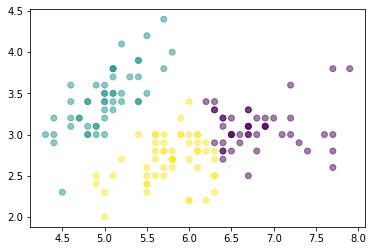

In [70]:
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)

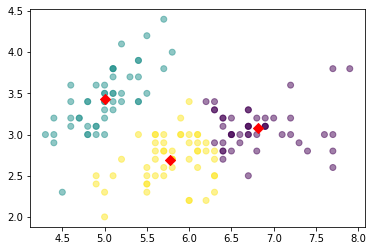

In [71]:
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()


#### 8.3. k 평균 알고리즘의 한계점

k 평균 알고리즘은 많은 장점을 갖고 있는 반면 다음과 같은 한계점 및 주의할 점도 갖고 있습니다.

- 첫째, 아웃라이어에 민감합니다. 아웃라이어가 있는 경우 이런 극단값에 의해 전체 평균이 영향을 받는 평균의 특성 상 k 평균 알고리즘 역시 **극단값에 의해 중심점이 왜곡되기 쉽습니다.** 따라서 이런 문제를 완화하기 위해 평균 대신 **중앙값(median)**을 이용하는 k-median 알고리즘이 대안으로 사용되기도 합니다. 
 
![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst24.png?raw=true)
<br><br>

- 둘째, 유형별 '데이터의 분산이 비슷하고 구형(공모양)으로 분포되어 있는 경우'가 아니라면 부적절한 결과를 낼 수 있습니다. 아래 세 개의 그림은 각각 다른 특징을 갖는 데이터들에 대해 k 평균 알고리즘을 적용한 결과입니다. 보다시피 가장 왼쪽 그림처럼 각 유형이 비슷한 분포를 갖는 경우에는 직관과 일치하는 결과를 보이지만, 가운데와 오른쪽의 경우 의도와 다른 결과가 나옵니다.  

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst25.png?raw=true)
<br><br>

위 그림에서 두번째 예시의 경우를 보면, 크게 네 개의 유형 (웃는 얼굴의 테두리, 양쪽 눈 모양, 입 모양) 으로 분류가 되는 것이 적절해 보이지만 k 평균 알고리즘 결과를 보면 전체를 크게 네 등분으로 나눈 결과가 나옵니다. 그 이유는 앞서 설명했듯이 이 알고리즘은 **전체 유형이 동일한 분산과 분포를 갖는다고 가정**하기 때문입니다. 그러나 보다시피 이 데이터는 각 유형이 분산도 다르고 분포의 형태도 다릅니다. 따라서 이런 경우 k 평균 알고리즘은 좋은 선택이 아닙니다.


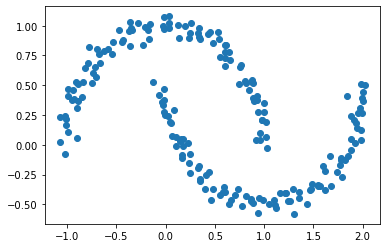

In [18]:
from sklearn.datasets import make_moons

# 달 모양 데이터를 만듬
X, y = make_moons(n_samples=200, noise=0.05, random_state=0) 
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [23]:
def plot_result(X, y, title='result'):
    plt.scatter(X[y==0, 0], X[y==0, 1], c='lightblue', marker='o', s=40, label='cluster_1')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o', s=40, label='cluster_2')
    
    plt.title(title)
    plt.legend()
    plt.show()

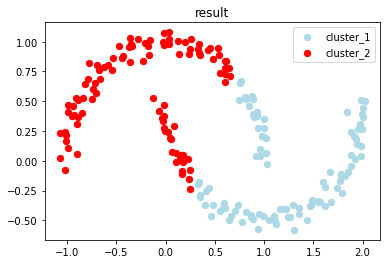

In [24]:
model = KMeans(n_clusters=2,algorithm='auto')
y_km = model.fit_predict(X)

plot_result(X, y_km)

<br>

세번째 예시의 경우엔 아마도 가운데 가장 큰 구형 데이터, 왼쪽 상단의 작은 구형, 오른쪽 상단의 작은 구형 데이터로 유형이 나뉘는 것이 더 좋겠지만 역시 의도와 다른 결과가 나옵니다. 이 경우엔 비록 각 유형의 데이터들이 모두 구형이긴 하지만 분산이 다르기 때문에 그렇습니다. 결국 이렇게 각 유형의 분산이 다르거나 분포의 형태가 다른 데이터의 경우 k 평균 알고리즘 대신 다른 방법을 사용하는 것이 좋습니다. 그럼 먼저 두번째 예시부터 대안을 살펴 보죠. <br><br>


#### 8.4. 밀도기반 클러스터링 (DBSCAN)

두번째로 소개할 기법은 **밀도 기반 클러스터링**입니다. 이 방법은 말 그대로 개체들의 **밀도를 계산하여 촘촘하게 분포되어 있는 개체들끼리 그룹을 묶는 방식**을 사용합니다. 이를 위해 이 알고리즘에서는 두 개의 파라미터를 정해주는데, 하나는 **밀도를 계산할 범위(epsilon)**이고 또 하나는 하나의 그룹으로 묶는데 **필요한 최소 개체수(minPts)입니다.** 알고리즘의 동작 방식은 다음과 같습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst26.jpg?raw=true)

- (a) 먼저 임의의 점 p에서 epsilon 만큼의 범위 (그림에서 원으로 표시된 범위) 내에 포함된 점들의 개수가 minPts 이상이면 점 p를 중심으로한 클러스터를 형성합니다. 
- (b) p와 같은 클러스터에 있는 다른 점 q를 중심으로 하는 epsilon 만큼의 범위를 다시 잡아 해당 범위 내에 minPts 이상의 개체가 포함되어 있으면 이 범위 내 개체들을 (a)와 같은 그룹으로 묶습니다.
- (c) 만약 (b) 과정에서 더 이상 그룹에 포함할 개체가 없으면 해당 클러스터가 아닌 다른 점을 중심으로 (a), (b) 과정을 반복합니다. 
- (c) 만약 점 r를 중심으로 epsilon 범위 내에 minPts 이상의 개체가 존재하지 않으면, r은 아웃라이어로 처리합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst27.png?raw=true)
<br><br>

밀도 기반 클러스터링 알고리즘은 유사한 개체들을 계속 연결하여 하나의 군집으로 묶는 방식이기 때문에 k 평균 알고리즘처럼 데이터의 분포가 구형이고 분산이 일정해야 한다는 제약이 없습니다. 또한 몇 개의 그룹을 묶을 것인지 미리 지정하지 않고 하나의 군집으로 묶을 최소한의 밀도만 지정해 주면 알아서 군집을 묶어 줍니다. 따라서 아래 그림처럼 다양한 형태의 분포에 대해서도 그룹을 묶을 수 있으며, 다른 개체들과 상대적으로 멀리 떨어져 있는 아웃라이어들을 군집에서 제외할 수 있는 장점이 있습니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst28.png?raw=true)
<br><br>

반면 각 유형 사이 공간의 데이터 밀도가 충분히 낮지 않다면, 다시 말해 각 유형 간의 경계가 모호하다면 군집 분석이 잘 안되는 한계를 갖고 있습니다. 예를 들어 k 평균 알고리즘의 한계점을 설명할 때 소개한 세번째 그림의 경우 세 개의 유형 사이에 경계가 불분명하기 때문에 DBSCAN을 이용하더라도 유형을 잘 묶지 못합니다. 밀도기반 클러스터링 알고리즘은 sklearn에서는 `from sklearn.cluster import DBSCAN`으로 이용할 수 있습니다.


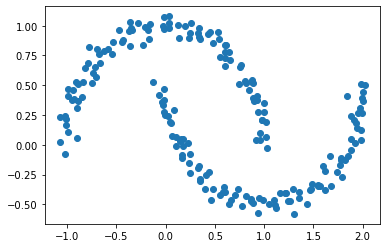

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# 달 모양 데이터를 만듬
X, y = make_moons(n_samples=200, noise=0.05, random_state=0) 
plt.scatter(X[:, 0], X[:, 1])
plt.show()

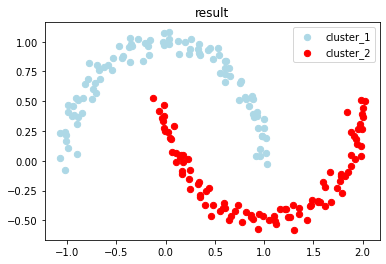

In [29]:
model = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_km = model.fit_predict(X)

plot_result(X, y_km)

<br>

#### 8.5. 확률 분포 기반 클러스터링 (Gaussian Mixture Model)

가우시안 혼합 모델은 전체 데이터의 확률 분포가 **여러 개의 가우시안 분포의 조합으로 이뤄져 있다고 가정하고 각 분포에 속할 확률이 높은 데이터끼리 군집을 묶는 방법**입니다. 가령 분석할 데이터의 분포가 아래 그림과 같다면 이 데이터는 두 개의 정규 분포가 결합된 형태라고 생각할 수 있습니다. 그러면 각 데이터가 정규 분포 상으로 볼 때 둘 중 어떤 분포에 속할 확률이 더 높은지를 계산하여 군집을 나누는 것이죠.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst29.png?raw=true)
<br><br>

이 방법을 이용하면 k 평균 알고리즘이나 DBSCAN 알고리즘으로는 그룹을 잘 묶을 수 없었던 아래 데이터도 군집을 잘 묶을 수 있습니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst30.png?raw=true)
<br><br>

가우시안 혼합 모델은 k평균 알고리즘처럼 각 유형의 중심(평균)을 중심으로 유형을 표현하면서도 DBSCAN처럼 각 유형별 데이터의 분산이 일정하지 않더라도 유형을 잘 묶을 수 있는 장점을 갖고 있어 유용한 방법입니다. 그러나 물론 가우시안 혼합 모델도 만능은 아닙니다. **이 기법은 데이터가 정규 분포의 조합으로 표현된다는 가정 하에 분석하는 방식**이기 때문에 아래 그림과 같이 이 가정에 어긋나는 데이터라면 클러스터링이 부적절하게 될 수 있습니다. 또한 이 기법은 **계산량이 많기 때문에 대량의 데이터에 사용하기에는 적절하지 않습니다.** 아래 그림만 봐도 GMM도 만능은 아니라는 것을 알 수 있습니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst31.png?raw=true)
<br><br>

sklearn에서는 `from sklearn.mixturemas import GaussianMixture`를 이용해 이용할 수 있습니다.

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture 

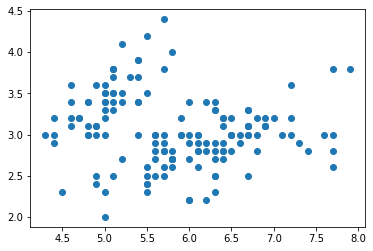

In [59]:
iris = datasets.load_iris() 
X = iris.data[:, :2] 
d = pd.DataFrame(X) 
plt.scatter(d[0], d[1]) 

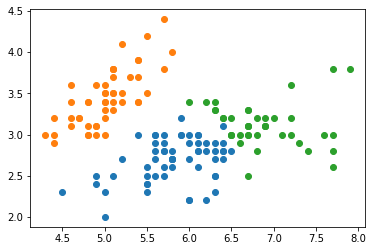

In [64]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(d) 
  
labels = gmm.predict(d) 
d['labels']= labels 
d0 = d[d['labels']== 0] 
d1 = d[d['labels']== 1] 
d2 = d[d['labels']== 2] 
  
plt.scatter(d0[0], d0[1]) 
plt.scatter(d1[0], d1[1]) 
plt.scatter(d2[0], d2[1]) 


### 8.6. 계층 클러스터링

위에서 소개한 세 가지 알고리즘은 데이터들의 분포나 평균을 측정할 수 있는 경우에만 사용할 수 있습니다. 그러나 **실제 데이터 중에서는 이런 것들을 측정할 수 없는 경우도 있습니다.** 대표적인 것이 텍스트 데이터입니다. 가령 아래와 같은 세 개의 문장이 있다고 하죠.

- 1) 아버지가 방에 들어가신다.
- 2) 어머니가 방에 들어가신다.
- 3) 나는 바둑이와 산책을 나갔다. 
<br><br>

앞서 소개한 문자열 매칭 알고리즘을 이용한다면 문장 간의 유사도를 측정하는 것은 가능합니다. 따라서 이를 통해 우리는 1)과 2) 사이의 유사도가 3) 보다 더 가깝다는 것을 알 수 있습니다. 그러나 1)과 2)의 평균 혹은 2)와 3)의 평균을 측정할 수는 없습니다. 또한 위 세 문장의 적절한 확률 분포나 공분산 역시 구할 수 없습니다. 이처럼 **데이터 각 쌍에 대해서는 유사도를 측정할 수 있지만 집단에 대한 평균이나 분산 등을 구할 수 없는 경우**에는 위 세 개의 알고리즘은 이용할 수 없습니다. 반면 계층 클러스터링은 이런 경우에도 사용할 수 있는 기법입니다. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst32.png?raw=true)
<br><br>

계층 클러스터링은 개체 간의 모든 쌍에 대해서 먼저 유사도를 구한 후 유사도가 높은 개체들부터 여러 단계의 계층 구조를 생성해 나가면서 군집을 구성하는 기법입니다. 앞서 예로 든 문장 데이터들이 있는 경우 2편에서 소개한 문자열 매칭 알고리즘을 이용해서 문장 간의 유사도를 측정합니다. 이후 가장 유사도가 높은 개체쌍끼리 먼저 그룹을 묶어서 가장 하위 단계의 계층을 만든 후 각 그룹 간의 유사도를 측정하여 다시 유사도가 높은 군집쌍끼리 상위 그룹을 묶어 나가면서 점차 상위 계층을 형성해 나갑니다. 이렇게 하면 결국 모든 군집이 최상위 계층에서 하나도 묶이게 되는데 이 상태에서 몇번째 단계에서 군집을 나눌지 정하여 최종적으로 그룹을 분류하는 방식입니다. 아래 그림은 방금 설명한 내용을 도식화한 것입니다. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst33.png?raw=true)
<br><br>

sklearn에서는 `from scipy.cluster.hierarchy import fcluster`를 이용하면 계층적 클러스터링을 사용할 수 있습니다.

In [81]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

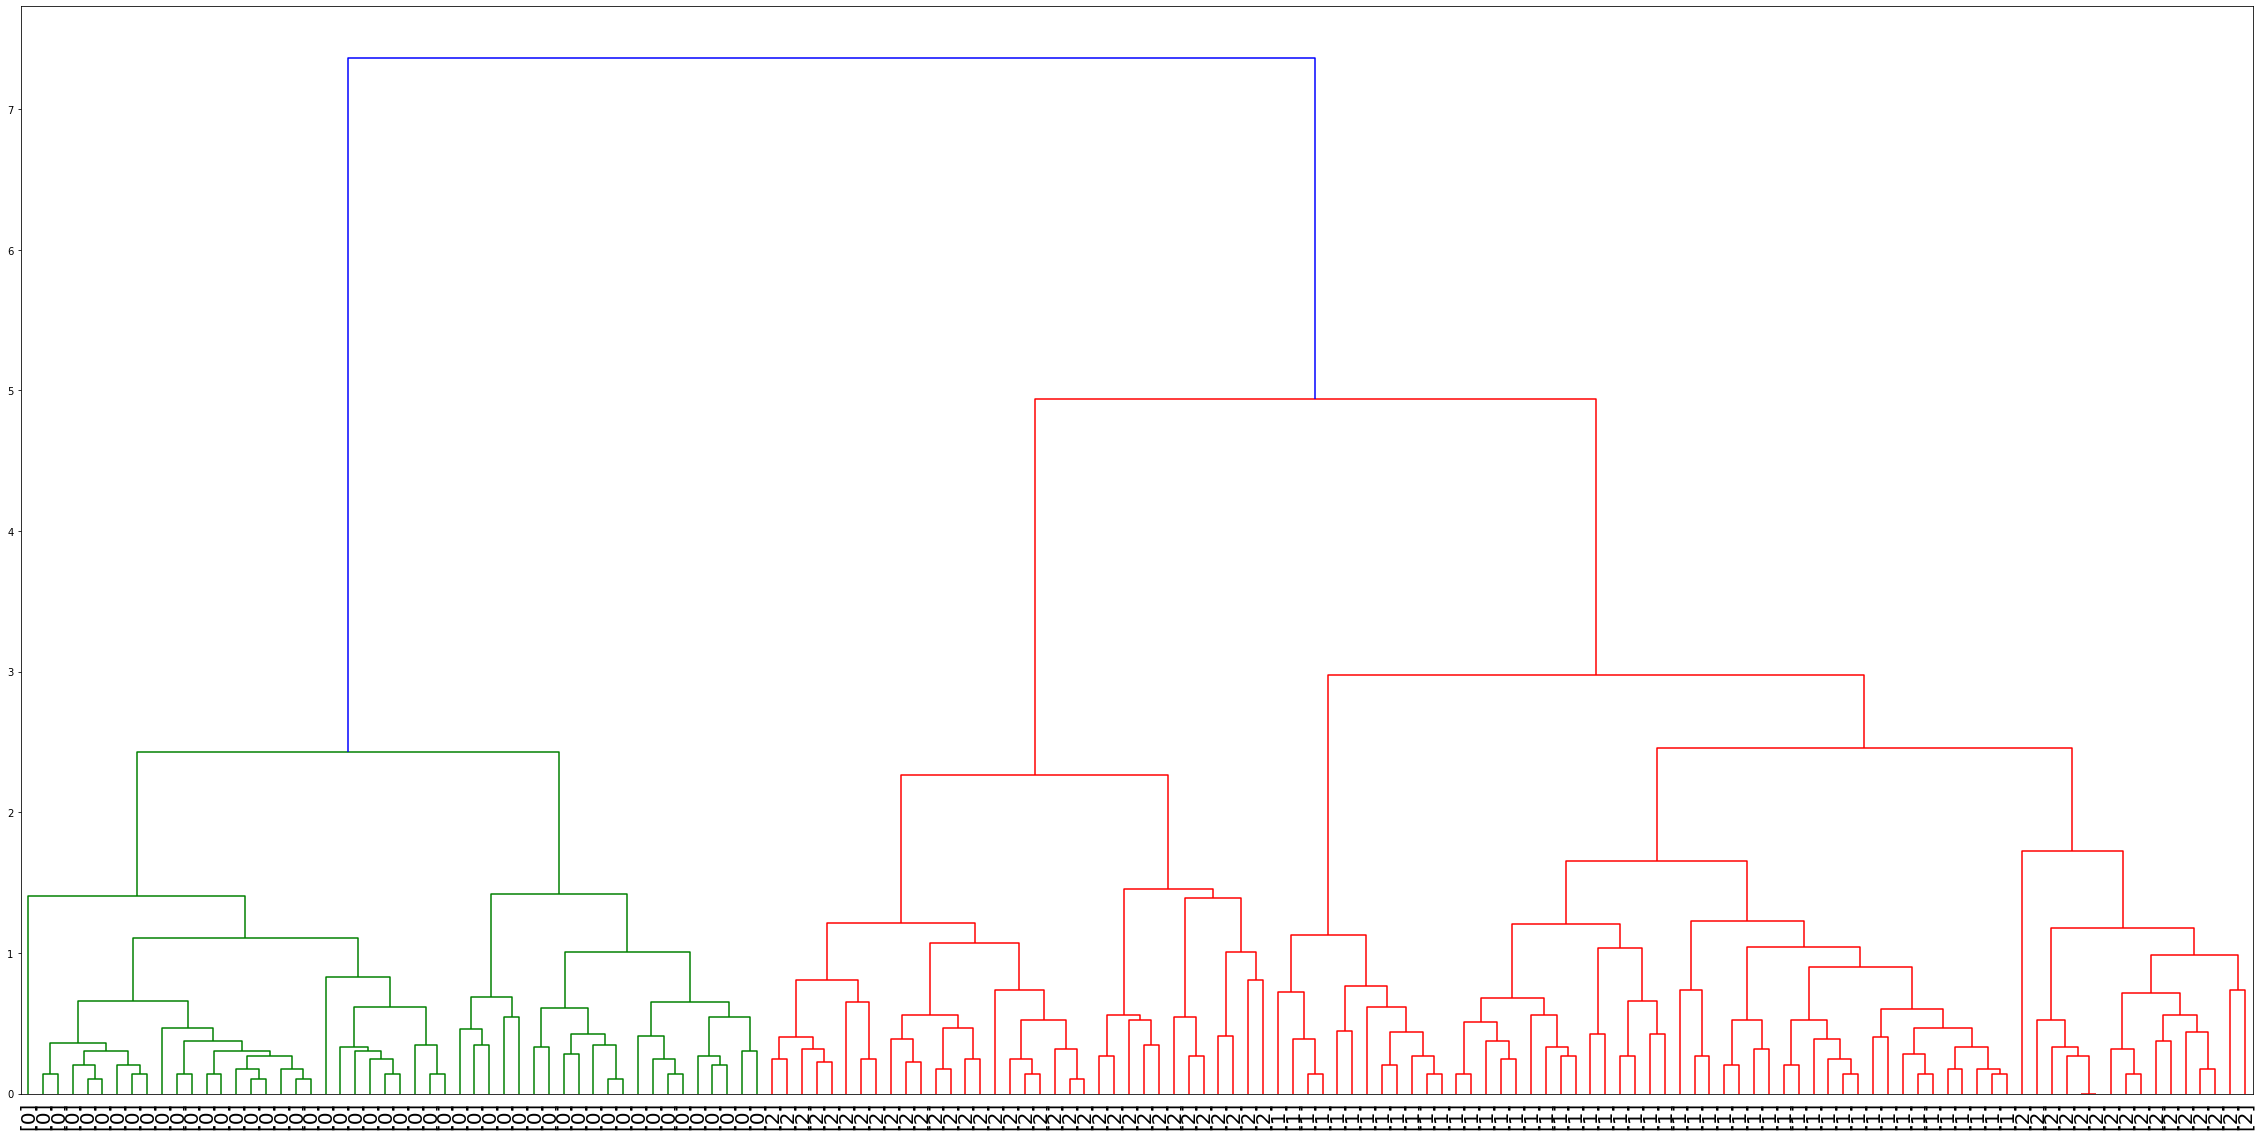

In [82]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(data,method='complete')

plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels[['labels']].to_numpy(),
           leaf_rotation=90,
           leaf_font_size=20,
)

plt.show()

In [83]:
from scipy.cluster.hierarchy import fcluster

# y값을 3에서 잘라서 클러스터링함
predict = pd.DataFrame(fcluster(mergings, 3, criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)

labels    0   1   2
predict            
1        50   0   0
2         0   0  34
3         0  50  16


![](https://t1.daumcdn.net/cfile/tistory/99E7833359DE217614)

<br>

**계층 클러스터링은 중심점을 구할 수 없는 시퀀스 데이터에 대해서도 군집을 묶을 수 있는 장점이 있는 반면, 모든 쌍에 대해서 반복적으로 유사도를 구해야 하기 때문에 계산량이 매우 많은 단점이 있습니다.** 

### 9. 마무리

지금까지 소개한 군집 분석 알고리즘들의 특징 및 장/단점을 간략하게 정리하면 아래 표와 같습니다. 다만 알고리즘의 장/단점은 상대적인 비교를 위한 내용일 뿐 엄밀한 정보는 아닙니다. 

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/cst34.png?raw=true)
<br><br>

물론 이 외에도 다양한 군집 알고리즘이 있으며 역시 제각기 다른 특성 및 장/단점을 갖고 있습니다. 그렇다면 어떤 방법을 사용하는 것이 좋은지 어떻게 판단할 수 있을까요? 우선 중요한 것은 군집 분석의 목적과 사용되는 데이터의 특성을 파악하는 것입니다. 만약 데이터가 수백 만개의 대규모 데이터인데 서버 한 대에서 처리해야 하다면 GMM이나 계층 클러스터링은 거의 사용할 수 없습니다. 또한 앞서 예로 든 문장 간의 유사도를 측정하는 경우라면 평균을 구하는 방식인 k 평균이나 GMM은 사용할 수 없죠. 여기까지 군집분석에 관한 내용이였습니다. 다음 시간에는 차원축소 알고리즘에 대해 공부해보겠습니다.